<a href="https://colab.research.google.com/github/YasuharuSuzuki/25_programing2/blob/main/" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 練習プログラム1　あやめの分類

In [ ]:
### ライブラリのインストール

In [ ]:
# matplotlib日本語対応ライブラリのインストール
!pip install japanize_matplotlib

### GoogleDrive の Mount

In [ ]:
# drive.mount()を使用してGoogleDriveをMount
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# os.chdir()を使用してカレントディレクトリを変更。作成したショーットカット名を使ってパスを指定します。
import os
os.chdir('/content/drive/MyDrive/＜作成したショートカット名＞')

### ライブラリのimport

In [4]:
import pandas as pd # pandasモジュールを読み込む（データ分析ライブラリ）
import numpy as np # NumPyモジュールを読み込む（数値演算ライブラリ）
import matplotlib.pyplot as plt # matplotlib.pyplot モジュールを読み込む（可視化ライブラリ。細かいカスタマイズが可能）
import seaborn as sns # Seabornモジュールを読み込む（可視化ライブラリ。pairplotなど多くのデータ分析情報をplotするのに向いている）

from sklearn import svm # scikit-learnのSVM(サポートベクターマシン)
from sklearn.model_selection import train_test_split # scikit-learnの訓練データ / テストデータ 分割ライブラリ
from sklearn import metrics # scikit-learnの精度算出用ライブラリ
from sklearn.ensemble import RandomForestClassifier # scikit-learnのRandomForest(ランダムフォレスト)

from imblearn.over_sampling import SMOTE  # 不均衡データサンプリングライブラリ
from mpl_toolkits.axes_grid1 import Divider, Size # matplotlib 領域修正用クラス
from mpl_toolkits.axes_grid1.mpl_axes import Axes # matplotlib 領域修正用クラス

### 定数の定義
- データファイルパスを定義しておきます
- データ読み込みの際にご使用してください。修正は不要です

In [5]:
# データファイルパス定義
IRIS_CSV = "./data/iris.csv"

### 練習プログラム1-1　あやめのデータセットを読み込む(1点)

In [6]:
# あやめのデータセットを読み込み
df_iris = pd.read_csv(IRIS_CSV, index_col=0) # idをindexに使用するため、index_col=0を指定します

### 練習プログラム1-2　読み込んだDataFrameを確認(0.5点)

In [7]:
df_iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


In [8]:
df_iris.info()

<class 'pandas.core.frame.DataFrame'>
Index: 150 entries, 1 to 150
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


In [9]:
df_iris.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [10]:
df_iris.Species.value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

### 練習プログラム1-3　SVCで分類モデルを作る(1点)

In [11]:
# 説明変数と目的変数に分ける
X = df_iris.iloc[:,:-1]
y = df_iris.iloc[:,-1]

In [12]:
# 訓練データとテストデータに分割する
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0) # 特に理由がない限りは、学習データ：テストデータは 7：3 でわけましょう。
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)  # stratifyを指定すると層別にきれいに分けることができます

In [13]:
# 学習する
svc_model = svm.SVC()    # モデルを作る
svc_model.fit(X_train, y_train)    # 訓練する

SVC()

### 練習プログラム1-4　SVCで正答率と誤った個数を算出する(0.5点)

In [14]:
accuracy = svc_model.score(X_test, y_test)    # 正答率を調べる
print(f"正答率 = {accuracy}")

predicted = svc_model.predict(X_test)    # テストデータの分類結果
n_error = (y_test != predicted).sum()    # 正解と分類結果を比較する
print(f"誤った個数：{n_error}")

正答率 = 0.9777777777777777
誤った個数：1


### 練習プログラム1-5　学習済みSVCモデルの分類レポート(classification report)を作成する(1点)

In [15]:
# 分類レポート
print("classification report")
report = metrics.classification_report(y_test, predicted, output_dict=True)
pd.DataFrame(report).T

classification report


,precision,recall,f1-score,support
Iris-setosa,1.000000,1.000000,1.000000,16.000000
Iris-versicolor,1.000000,0.944444,0.971429,18.000000
Iris-virginica,0.916667,1.000000,0.956522,11.000000
accuracy,0.977778,0.977778,0.977778,0.977778
macro avg,0.972222,0.981481,0.975983,45.000000
weighted avg,0.979630,0.977778,0.977943,45.000000


- precision(適合率) --- 正解と予測したもののうち、正しかった確率
- recall(再現率) --- 実際に正解のデータのうち、どれだけ正解と予測できたかを示す確率
- f1-score --- PrecisionとRecall の調和平均

### 練習プログラム1-6　学習済みSVCモデルで混合行列(confusion matrix)を表示する(0.5点)

In [16]:
result_labels = list(df_iris["Species"].unique())
result_labels

['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

confusion matrix


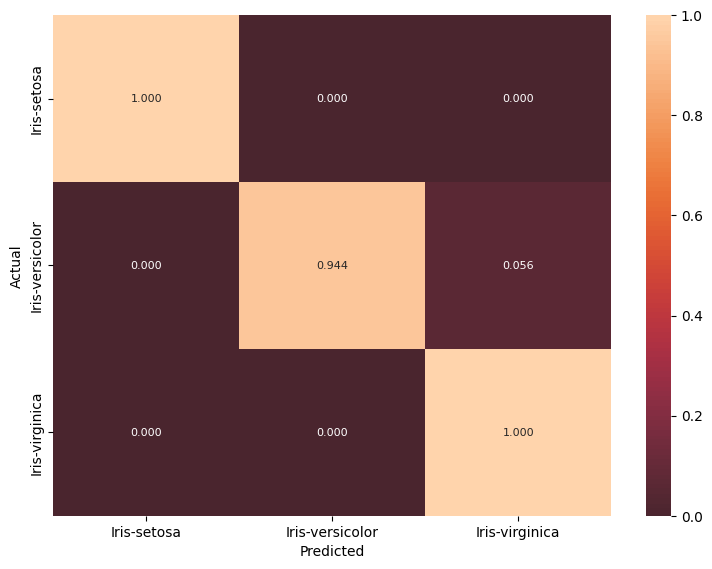

In [17]:
# 混合行列
print("confusion matrix")
cm = metrics.confusion_matrix(y_test, predicted)

# 割合で表示したいので値を変換する
cm2 = cm.copy().astype(np.float64)
for y_index in range(len(cm2)):
    cm2[y_index] = (cm2[y_index] / cm2[y_index].sum())

plt.subplots(figsize=(9, 6.5)) # 図の大きさを指定
heatmap = sns.heatmap(cm2, vmin=0, vmax=1, center=-0.25, annot=True, fmt=".3f",  annot_kws={"size":8},
                     xticklabels=result_labels, yticklabels=result_labels) # seabornで可視化する
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

### 練習プログラム1-7　SVCの学習結果を考察してみましょう(1点)

### 考察
- こちらに考察を記載しましょう
- 作成したモデルの課題（不正解のデータ）からモデルの改善策を検討しましょう。

In [18]:
y_train.value_counts()

Species
Iris-virginica     39
Iris-setosa        34
Iris-versicolor    32
Name: count, dtype: int64

### 練習プログラム1-8. RandomForestClassifierで分類モデルを作る(0.5点)

In [19]:
# SMOTEを使用して不均衡データを水増しする
value_counts = y_train.value_counts()
max_count = max(y_train.value_counts().values)
smote_ratio = {index : max_count for index, value in value_counts.items()}
smote_ratio

{'Iris-virginica': 39, 'Iris-setosa': 39, 'Iris-versicolor': 39}

In [20]:
smote = SMOTE(sampling_strategy=smote_ratio, random_state=0)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [21]:
# 揃えた
y_train_resampled.value_counts()

Species
Iris-versicolor    39
Iris-virginica     39
Iris-setosa        39
Name: count, dtype: int64

In [22]:
# RandomForestで学習させる
rf_model = RandomForestClassifier(max_depth=3)    # max_depth のパラメータを指定する
rf_model.fit(X_train_resampled, y_train_resampled)     # 訓練データと教師データで学習する

RandomForestClassifier(max_depth=3)

### 練習プログラム1-9. RandomForestClassifierで正答率と誤った個数を算出する(0.5点)

In [23]:
# モデルの学習結果を評価する
accuracy = rf_model.score(X_test, y_test)    # テストデータで試す
print(f"正答率 = {accuracy}")

predicted = rf_model.predict(X_test)    # テストデータの分類結果
n_error = (y_test != predicted).sum()    # 正解と分類結果を比較する
print(f"誤った個数：{n_error}")

正答率 = 0.9777777777777777
誤った個数：1


### 練習プログラム1-10　学習済みRandomForestClassifierモデルの分類レポート(classification report)を作成する(0.5点)

In [24]:
# 分類レポート
print("classification report")
report = metrics.classification_report(y_test, predicted, output_dict=True)
pd.DataFrame(report).T

classification report


,precision,recall,f1-score,support
Iris-setosa,1.000000,1.000000,1.000000,16.000000
Iris-versicolor,1.000000,0.944444,0.971429,18.000000
Iris-virginica,0.916667,1.000000,0.956522,11.000000
accuracy,0.977778,0.977778,0.977778,0.977778
macro avg,0.972222,0.981481,0.975983,45.000000
weighted avg,0.979630,0.977778,0.977943,45.000000


### 練習プログラム1-11　学習済みRandomForestClassifierモデルの混合行列(confusion matrix)を表示する(0.5点)

confusion matrix


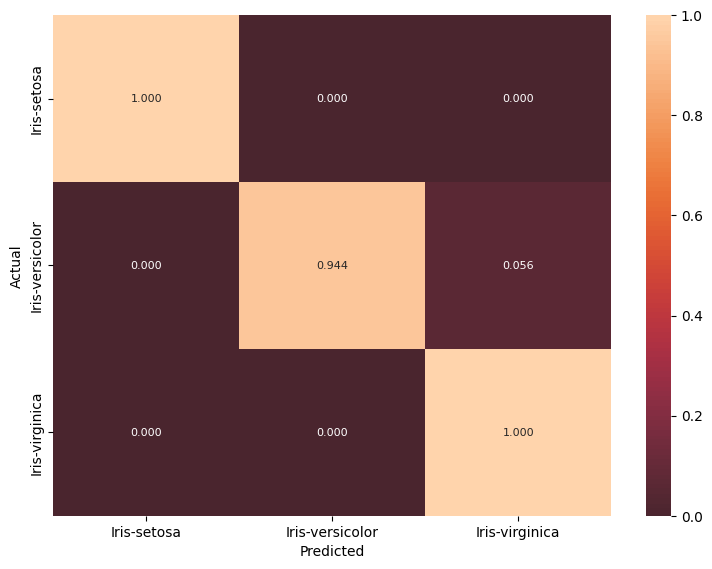

In [25]:
# 混合行列
print("confusion matrix")
cm = metrics.confusion_matrix(y_test, predicted)

# 割合で表示したいので値を変換する
cm2 = cm.copy().astype(np.float64)
for y_index in range(len(cm2)):
    cm2[y_index] = (cm2[y_index] / cm2[y_index].sum())

plt.subplots(figsize=(9, 6.5)) # 図の大きさを指定
heatmap = sns.heatmap(cm2, vmin=0, vmax=1, center=-0.25, annot=True, fmt=".3f",  annot_kws={"size":8},
                     xticklabels=result_labels, yticklabels=result_labels) # seabornで可視化する
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

### 練習プログラム1-12　学習済みRandomForestClassifierモデルのFeatureImportanceを表示する(0.5点)
- FeatureImportanceとは目的変数の分類にどの程度寄与しているかを示す指標です
- 決定木系のモデルでしか使用できません

In [26]:
def _convert_column_name_for_feature_importance(columns):
    new_columns = []
    for name_src in columns:
        new_columns.append(name_src)

    return new_columns

# figureをmargin付きで作成する
def _make_figure_with_margin(ax_w_px=400, ax_h_px=300, ax_margin_px = (50, 50, 50, 50), fig_dpi=100):

    # サイズ指定のための処理 ↓↓ ここから ↓↓ 
    ax_w_inch = ax_w_px / fig_dpi
    ax_h_inch = ax_h_px / fig_dpi
    ax_margin_inch = (ax_margin_px[0] / fig_dpi,
                      ax_margin_px[1] / fig_dpi,
                      ax_margin_px[2] / fig_dpi,
                      ax_margin_px[3] / fig_dpi)  # Left,Top,Right,Bottom [inch]

    fig_w_inch = ax_w_inch + ax_margin_inch[0] + ax_margin_inch[2] 
    fig_h_inch = ax_h_inch + ax_margin_inch[1] + ax_margin_inch[3]

    fig = plt.figure(dpi=fig_dpi, figsize=(fig_w_inch, fig_h_inch))
    ax_p_w = [Size.Fixed(ax_margin_inch[0]),Size.Fixed(ax_w_inch)]
    ax_p_h = [Size.Fixed(ax_margin_inch[1]),Size.Fixed(ax_h_inch)]
    divider = Divider(fig, (0.0, 0.0, 1.0, 1.0), ax_p_w, ax_p_h, aspect=False)
    ax = Axes(fig, divider.get_position())
    ax.set_axes_locator(divider.new_locator(nx=1,ny=1))
    fig.add_axes(ax)
    return fig, ax

# FeatureImportanceをplotする
def _plot_feature_importances(x_column_names, best_estimator):
    importances = pd.DataFrame(
        {"features": _convert_column_name_for_feature_importance(x_column_names),
         "importances": best_estimator.feature_importances_})

    importances = importances[importances['importances'] != 0] # 重要度ゼロのものは表示しない
    importances.sort_values(by="importances", inplace=True, ignore_index=True, ascending=True)
    
    fig, ax = _make_figure_with_margin(800, 100+50*len(importances), ax_margin_px = (150, 50, 50, 50))
    plt.barh(importances['features'], importances['importances'])
    plt.title("Feature Importances (Zero variables are hidden)", fontsize=14)
    plt.show()

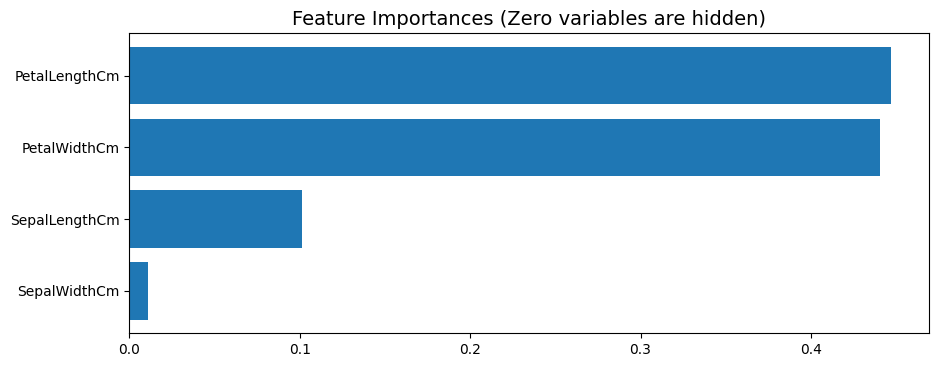

In [27]:
_plot_feature_importances(X_train.columns, rf_model)

## 練習プログラム1-13　RandomForestClassifierの学習結果を考察してみましょう(0.5点)

- こちらに考察を記載しましょう
- スコアの改善点があった場合は記載しましょう
- 機械学習モデルを作る上で気づいた点や、作り方に関して学んだ点を記載してみましょう
- 機械学習モデルを作るうえで面白いと感じた点がありましたら、感想を記載してみましょう。

---
---
---
---
---